In [1]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline

$\mu$ = $M_2$/{$M_1$ + $M_2$}   
$M_1$ + $M_2$ = 1$M_{sun}$  
$a_{bin}$ = 1 au   
G = 1  
$T_{bin}$ = 2$\pi$  
$v_{esc}$ = $\sqrt[2]\frac{2}{a_p}$   
$m_{planet}$ = $3*10^{-6}$$M_{sun}$

In [2]:
def setupSimulation(u, e, a_p, inc):
    #Initial Condition
    m1 = 1-u
    m2 = u
    m3 = 3e-6
    p=np.pi/2
    sim = rebound.Simulation()
    sim.add(m=m1)#Star A
    sim.add(m=m2, a=1., e=e)#Star B
    sim.add(m=m3, a=a_p, inc=inc) #Planet ABc
    sim.move_to_com()
    fig = rebound.OrbitPlot(sim,slices=0.8,xlim=[-5.,5],ylim=[-5.,5])# this is the initial state of orbit
    return sim

In [3]:
#Initial Condition
U = widgets.FloatSlider(
    value=0.1,
    min=0,
    max=0.5,
    step=0.01,
    description='mass ratio:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f'
)
E = widgets.FloatSlider(
    value=0.4,
    min=0,
    max=0.99,
    step=0.01,
    description='eccentricity:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f'
)
Inc = widgets.IntSlider(
    value=0,
    min=0,
    max=360,
    step=36,
    description='inclination:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
D = widgets.FloatSlider(
    value=3,
    min=1.5,
    max=6,
    step=0.01,
    description='distance', # the distance between planet and binary centre
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.2f'
)
display(U, E, Inc, D)

FloatSlider(value=0.1, continuous_update=False, description='mass ratio:', max=0.5, step=0.01)

FloatSlider(value=0.4, continuous_update=False, description='eccentricity:', max=0.99, step=0.01)

IntSlider(value=0, continuous_update=False, description='inclination:', max=360, step=36)

FloatSlider(value=3.0, continuous_update=False, description='distance', max=6.0, min=1.5, step=0.01)

/home/kong123/anaconda3/envs/py37/lib/python3.7/site-packages/rebound/plotting.py:81: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.hspace'].  Set pad=0 to keep the old behavior.
  ax_top   = divider.append_axes("top",  size="%.2f%%"%(100.*slices), sharex=ax_main)
/home/kong123/anaconda3/envs/py37/lib/python3.7/site-packages/rebound/plotting.py:83: MatplotlibDeprecationWarning: In a future version, 'pad' will default to rcParams['figure.subplot.wspace'].  Set pad=0 to keep the old behavior.
  ax_right = divider.append_axes("right", size="%.2f%%"%(100.*slices), sharey=ax_main)


Stable
CPU times: user 10 s, sys: 922 ms, total: 11 s
Wall time: 10.6 s


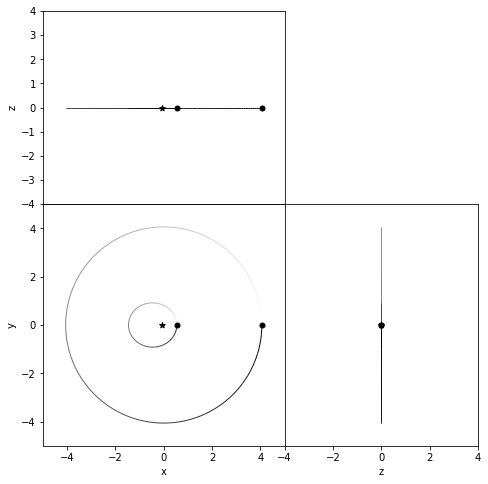

In [8]:
%%time
#Initial Condition for P-type with inclination
u = U.value
e = E.value
inc = Inc.value*np.pi/180
t = 2*np.pi
a_p = D.value
v_esc2 = 2/a_p # the square of v_escape
sim = setupSimulation(u, e, a_p, inc)
sim.exit_min_distance = 0.01
Noutputs = 10000*4
times = np.linspace(0, 10000*t, Noutputs)
distances = np.zeros(Noutputs)
velocity = np.zeros(Noutputs)
ps = sim.particles # ps is now an array of pointers. It will update as the simulation runs.
try:
    for i, time in enumerate(times):
        sim.integrate(time)
        dp = ps[1] - ps[2]
        dv = ps[2]
        distances[i] = np.sqrt(dp.x*dp.x+dp.y*dp.y+dp.z*dp.z)
        velocity[i] =  (dv.vx*dv.vx+dv.vy*dv.vy+dv.vz*dv.vz)
except rebound.Encounter as error:
    print("Encounter")
if max(velocity) > v_esc2:
    print("Escape")
else:
    print("Stable")


Text(55000, 0.42, 'Vesc2=0.49')

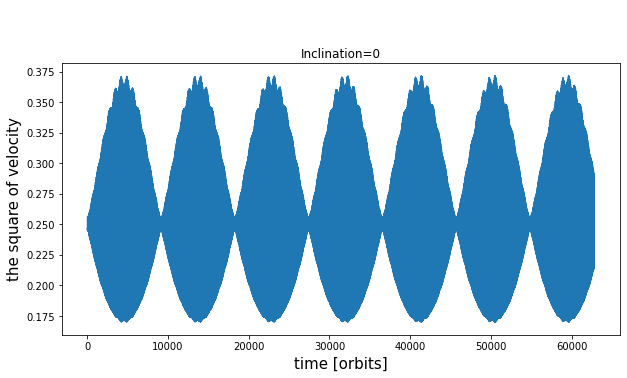

In [9]:
y=velocity[:]
x=np.linspace(0,10000*t, Noutputs)
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
ax.set_title("Inclination=%.2s"%Inc.value)
ax.set_xlabel("time [orbits]",fontsize=15)
ax.set_ylabel("the square of velocity",fontsize=15)
plt.plot(x, y, linewidth=1)
plt.annotate("Vmax2=%.4s"%max(velocity), xy=(55000,0.40),fontsize=13)
plt.annotate("Vesc2=%.4s"%v_esc2, xy=(55000,0.42),fontsize=13)

Text(300, 1, 'Encounter Criteria=0.01')

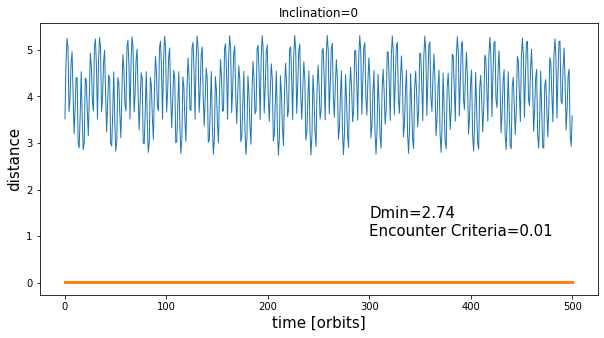

In [10]:
y=distances[:500]
x=np.linspace(0,500,500)
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(1,1,1)
ax.set_title("Inclination=%.2s"%Inc.value)
ax.set_xlabel("time [orbits]",fontsize=15)
#ax.set_xlim([0,sim.t/(2.*np.pi)])
ax.set_ylabel("distance",fontsize=15)
plt.plot(x, y,linewidth=1 );
plt.plot([0.0,500],[0.01,0.01], linewidth=3) # Plot our close encounter criteria;
plt.annotate("Dmin=%.4s"%min(y), xy=(300,1.4),fontsize=15)
plt.annotate("Encounter Criteria=0.01", xy=(300,1),fontsize=15)

Text(0, 0.5, 'y [AU]')

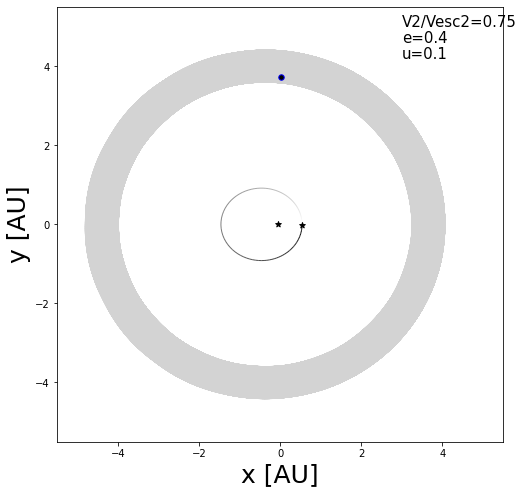

In [11]:
fig, ax = plt.subplots(figsize=(8,8))
ps = sim.particles
Noutputs = 10000*10
times = np.linspace(0, 10000*t, Noutputs)
v_ratio=max(velocity)/v_esc2

#manually set plot boundaries
lim = 5.5
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])

#plot the stars and planets with separate symbols
linewidth = 1.

for star in ps[:2]:
    ax.scatter(star.x, star.y, s=35*linewidth, marker='*', facecolor='black', zorder=3)
    
for planet in ps[2:]:
    ax.scatter(planet.x, planet.y, color='b',s=30*linewidth, facecolor='black', zorder=3)
# Now individually plot orbit trails with appropriate orbit
from rebound.plotting import fading_line

B = ps[1] # star B
o = np.array(B.sample_orbit())
lc = fading_line(o[:,0], o[:,1], linewidth=linewidth)
ax.add_collection(lc)

planet_x = np.zeros(Noutputs)
planet_y = np.zeros(Noutputs)
for i, time in enumerate(times):
    sim.integrate(time)
    planet_x[i] = ps[2].x
    planet_y[i] = ps[2].y
lc = fading_line(planet_x, planet_y, linewidth=0.01, color='lightgray')
ax.add_collection(lc)

plt.annotate("V2/Vesc2=%.4s"%v_ratio, xy=(3,5),fontsize=15)
plt.annotate("e=%s"%e, xy=(3,4.6), fontsize=15, fontweight='light')
plt.annotate("u=%s"%u, xy=(3,4.2), fontsize=15)
ax.set_xlabel("x [AU]",fontsize=25)
ax.set_ylabel("y [AU]",fontsize=25)